# Here we will Work on Wine Quality test

##  First Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_validate
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


Using TensorFlow backend.


## Now Import datasets

In [2]:
redwine = pd.read_csv('winequality-red.csv',sep=';')
whitewine = pd.read_csv('winequality-white.csv',sep=';')

X_redwine = redwine.iloc[:,:11]
Y_redwine = redwine.iloc[:,11]

X_whitewine = whitewine.iloc[:,:11]
Y_whitewine = whitewine.iloc[:,11]
print(X_redwine.head())
print(Y_whitewine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
0    6
1

### Here we will Declare the quality

In [3]:
quality_redwine = redwine["quality"].values
category_redwine = []
for num in quality_redwine:
    if num<5:
        category_redwine.append("Bad")
    elif num>6:
        category_redwine.append("Good")
    else:
        category_redwine.append("Mid")

quality_whitewine = whitewine["quality"].values
category_whitewine = []
for num in quality_whitewine:
    if num<5:
        category_whitewine.append("Bad")
    elif num>6:
        category_whitewine.append("Good")
    else:
        category_whitewine.append("Mid")


### Create new data for Visualization

#### Histogram for count the Quality

Mid     3655
Good    1060
Bad      183
Name: category, dtype: int64

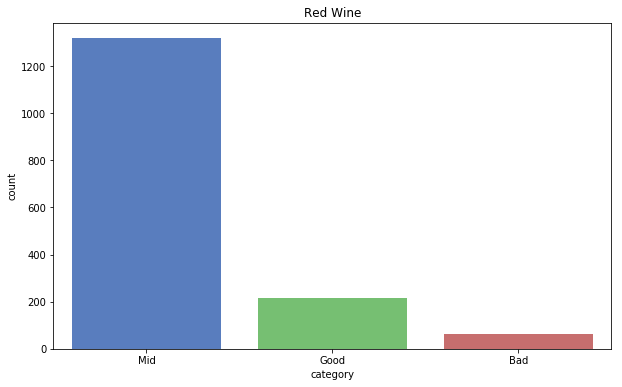

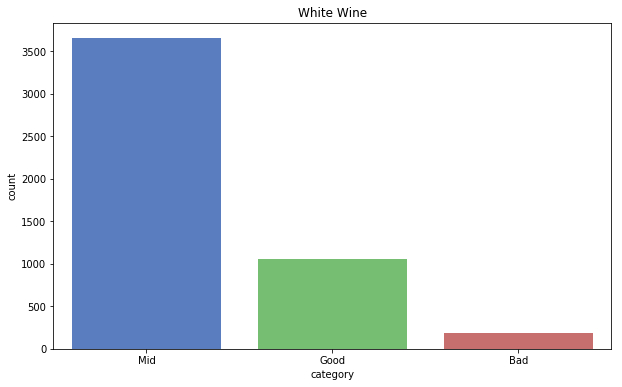

In [4]:
category_redwine = pd.DataFrame(data=category_redwine, columns=["category"])
data_redwine = pd.concat([redwine,category_redwine],axis=1)
data_redwine.drop(columns="quality",axis=1,inplace=True)
plt.figure(figsize=(10,6))
plt.title('Red Wine')
sns.countplot(data_redwine["category"],palette="muted")
data_redwine["category"].value_counts()

category_whitewine = pd.DataFrame(data=category_whitewine, columns=["category"])
data_whitwine = pd.concat([whitewine,category_whitewine],axis=1)
data_whitwine.drop(columns="quality",axis=1,inplace=True)
plt.figure(figsize=(10,6))
plt.title('White Wine')
sns.countplot(data_whitwine["category"],palette="muted")
data_whitwine["category"].value_counts()

### Heatmap for whole the Dataset

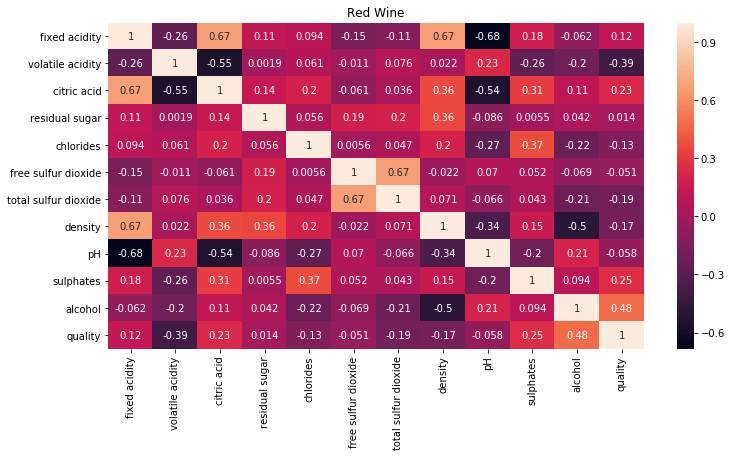

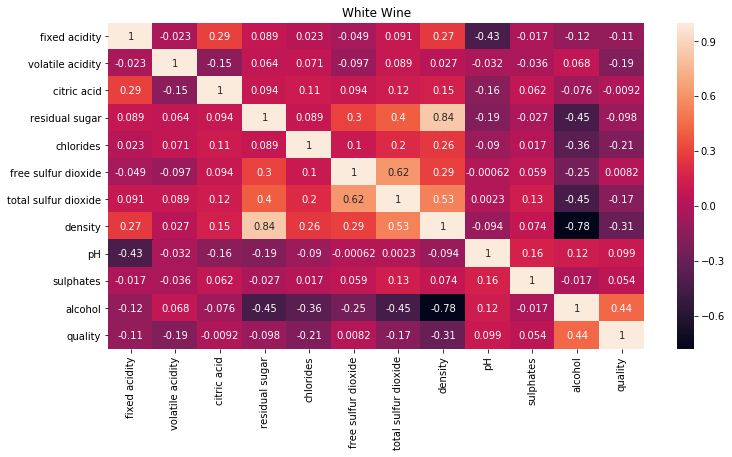

In [5]:
plt.figure(figsize=(12,6))
plt.title('Red Wine')
sns.heatmap(redwine.corr(),annot=True)

plt.figure(figsize=(12,6))
plt.title('White Wine')
sns.heatmap(whitewine.corr(),annot=True)


### Bar Plot for Quality

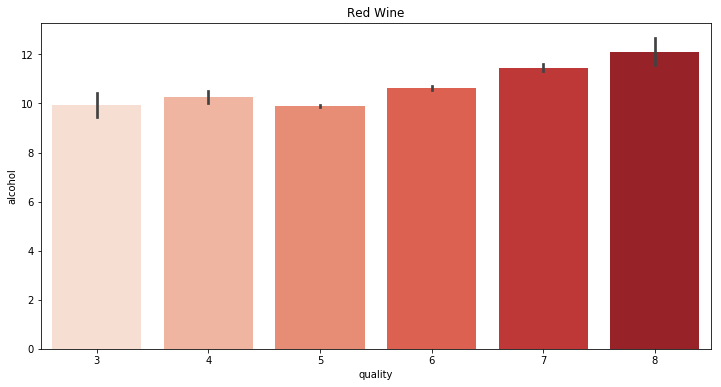

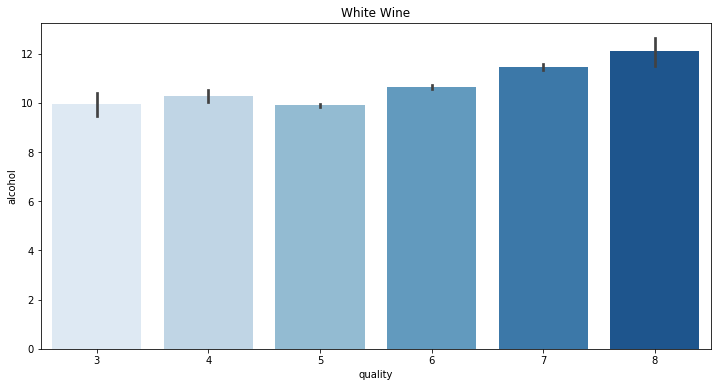

In [6]:
plt.figure(figsize=(12,6))
plt.title('Red Wine')
sns.barplot(x=redwine["quality"],y=redwine["alcohol"],palette="Reds")

plt.figure(figsize=(12,6))
plt.title('White Wine')
sns.barplot(x=redwine["quality"],y=redwine["alcohol"],palette="Blues")


### Joinplot for Density

C:\Users\hp\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'White Wine')

<Figure size 864x432 with 0 Axes>

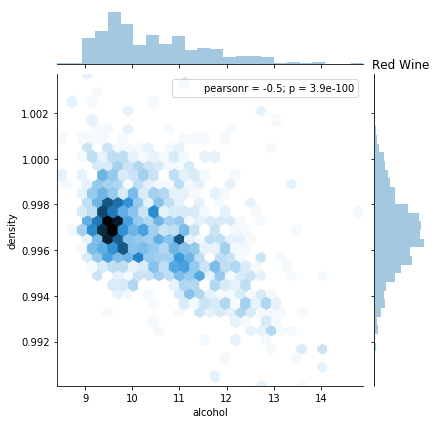

<Figure size 864x432 with 0 Axes>

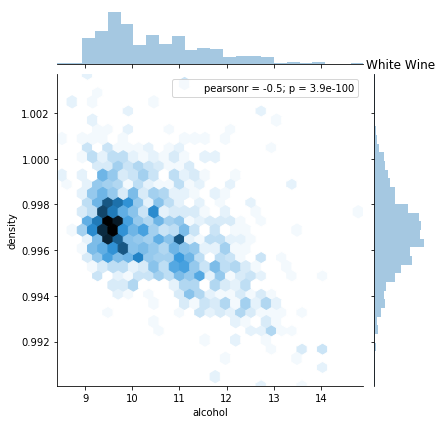

In [7]:

plt.figure(figsize=(12,6))
sns.jointplot(y=redwine["density"],x=redwine["alcohol"],kind="hex")
plt.title('Red Wine')


plt.figure(figsize=(12,6))
sns.jointplot(y=redwine["density"],x=redwine["alcohol"],kind="hex")
plt.title('White Wine')



###  Barplot Quality with fixed acidity

Text(0.5,1,'White Wine')

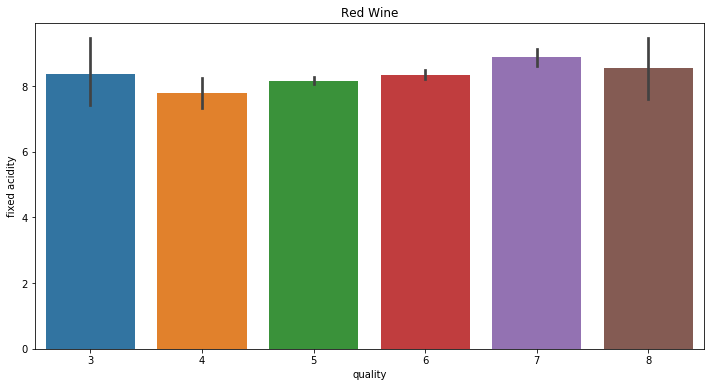

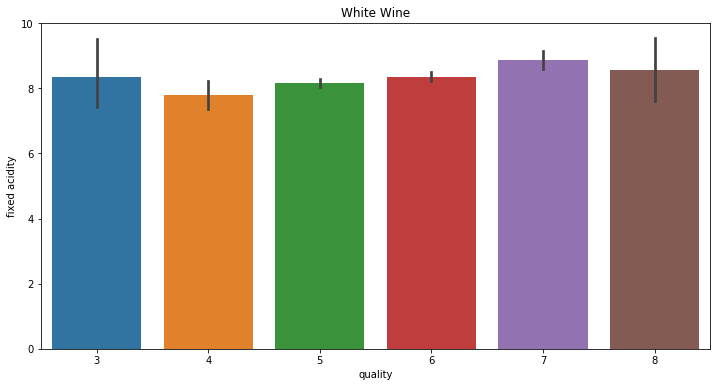

In [8]:

plt.figure(figsize=(12,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = redwine)
plt.title('Red Wine')


plt.figure(figsize=(12,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = redwine)
plt.title('White Wine')



## Splitting Dataset

In [9]:
from sklearn.cross_validation import train_test_split
X_train_red_wine, X_test_red_wine, Y_train_red_wine, Y_test_red_wine = train_test_split(X_redwine, Y_redwine, test_size = 0.20, random_state = 0)
X_train_white_wine, X_test_white_wine, Y_train_white_wine,Y_test_white_wine  = train_test_split(X_whitewine, Y_whitewine, test_size = 0.20, random_state = 0)


C:\Users\hp\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##  Random Forest Classification

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier_redwine_rmf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_redwine_rmf.fit(X_train_red_wine, Y_train_red_wine)
classifier_whitewine_rmf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_whitewine_rmf.fit(X_train_white_wine, Y_train_white_wine)
pred_redwine_rmf = classifier_redwine_rmf.predict(X_test_red_wine)
pred_whitewine_rmf = classifier_whitewine_rmf.predict(X_test_white_wine)


##  Feature Scalling

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_red_wine = sc.fit_transform(X_train_red_wine)
X_test_red_wine = sc.transform(X_test_red_wine)
X_train_white_wine = sc.fit_transform(X_train_white_wine)
X_test_white_wine = sc.transform(X_test_white_wine)

##  KNearest Classification

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier_redwine_kn = KNeighborsClassifier()
classifier_redwine_kn.fit(X_train_red_wine, Y_train_red_wine)
classifier_whitewine_kn = KNeighborsClassifier()
classifier_whitewine_kn.fit(X_train_white_wine, Y_train_white_wine)
pred_redwine_kn = classifier_redwine_kn.predict(X_test_red_wine)
pred_whitewine_kn = classifier_whitewine_kn.predict(X_test_white_wine)

## SVM

In [13]:
from sklearn.svm import SVC
classifier_redwine_svm = SVC()
classifier_redwine_svm.fit(X_train_red_wine, Y_train_red_wine)
classifier_whitewine_svm = SVC()
classifier_whitewine_svm.fit(X_train_white_wine, Y_train_white_wine)
pred_redwine_svm = classifier_redwine_svm.predict(X_test_red_wine)
pred_whitewine_svm = classifier_whitewine_svm.predict(X_test_white_wine)

## Using ANN

In [14]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
Y_whitewine_cat= labelencoder_y.fit_transform(Y_whitewine)
#  one hot encoding
from keras.utils import np_utils
Y_whitewine_cat = np_utils.to_categorical(Y_whitewine_cat)

labelencoder_y = LabelEncoder()
Y_redwine_cat= labelencoder_y.fit_transform(Y_redwine)
#  one hot encoding
from keras.utils import np_utils
Y_redwine_cat = np_utils.to_categorical(Y_redwine_cat)

In [15]:
X_train_red_wine_ann, X_test_red_wine_ann, Y_train_red_wine_ann, Y_test_red_wine_ann = train_test_split(X_redwine, Y_redwine_cat, test_size = 0.20, random_state = 0)
X_train_white_wine_ann, X_test_white_wine_ann, Y_train_white_wine_ann,Y_test_white_wine_ann = train_test_split(X_whitewine, Y_whitewine_cat, test_size = 0.20, random_state = 0)


In [16]:
sc=StandardScaler()
X_train_red_wine_ann = sc.fit_transform(X_train_red_wine_ann)
X_test_red_wine_ann = sc.transform(X_test_red_wine_ann)
X_train_white_wine_ann = sc.fit_transform(X_train_white_wine_ann)
X_test_white_wine_ann = sc.transform(X_test_white_wine_ann)
print(Y_test_red_wine_ann)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [17]:
# Initialising the ANN
classifier_redwine_ann = Sequential()
classifier_whitewine_ann = Sequential()

# Adding the input layer and the first hidden layer
classifier_redwine_ann.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu', input_dim =11))
classifier_whitewine_ann.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier_redwine_ann.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
classifier_whitewine_ann.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier_redwine_ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier_whitewine_ann.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))

# Compiling the ANN
classifier_redwine_ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
classifier_whitewine_ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier_redwine_ann.fit(X_train_red_wine_ann, Y_train_red_wine_ann, batch_size = 10, epochs = 100)
classifier_whitewine_ann.fit(X_train_white_wine_ann, Y_train_white_wine_ann, batch_size = 10, epochs = 100)




Epoch 1/100
1279/1279 [==============================] - 5s 4ms/step - loss: 0.1871 - acc: 0.4199
Epoch 2/100
1279/1279 [==============================] - 1s 961us/step - loss: 0.1077 - acc: 0.4433
Epoch 3/100
1279/1279 [==============================] - 1s 882us/step - loss: 0.1010 - acc: 0.5278
Epoch 4/100
1279/1279 [==============================] - 1s 869us/step - loss: 0.0946 - acc: 0.5614
Epoch 5/100
1279/1279 [==============================] - 1s 864us/step - loss: 0.0920 - acc: 0.5661
Epoch 6/100
1279/1279 [==============================] - 1s 865us/step - loss: 0.0909 - acc: 0.5661
Epoch 7/100
1279/1279 [==============================] - 1s 861us/step - loss: 0.0904 - acc: 0.5692
Epoch 8/100
1279/1279 [==============================] - 1s 880us/step - loss: 0.0898 - acc: 0.5762
Epoch 9/100
1279/1279 [==============================] - 1s 887us/step - loss: 0.0894 - acc: 0.5762
Epoch 10/100
1279/1279 [==============================] - 1s 950us/step - loss: 0.0891 - acc: 0.5809
E

Epoch 81/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.0788 - acc: 0.6505
Epoch 82/100
1279/1279 [==============================] - 1s 860us/step - loss: 0.0787 - acc: 0.6474
Epoch 83/100
1279/1279 [==============================] - 1s 709us/step - loss: 0.0785 - acc: 0.6505
Epoch 84/100
1279/1279 [==============================] - 1s 694us/step - loss: 0.0785 - acc: 0.6638
Epoch 85/100
1279/1279 [==============================] - 1s 706us/step - loss: 0.0784 - acc: 0.6583
Epoch 86/100
1279/1279 [==============================] - 1s 768us/step - loss: 0.0782 - acc: 0.6552
Epoch 87/100
1279/1279 [==============================] - 1s 843us/step - loss: 0.0780 - acc: 0.6568
Epoch 88/100
1279/1279 [==============================] - 1s 963us/step - loss: 0.0779 - acc: 0.6607
Epoch 89/100
1279/1279 [==============================] - 1s 930us/step - loss: 0.0779 - acc: 0.6638
Epoch 90/100
1279/1279 [==============================] - 1s 988us/step - loss: 0.0776 - acc:

3918/3918 [==============================] - 3s 801us/step - loss: 0.1089 - acc: 0.4324
Epoch 62/100
3918/3918 [==============================] - 3s 881us/step - loss: 0.1090 - acc: 0.4334
Epoch 63/100
3918/3918 [==============================] - 3s 865us/step - loss: 0.1089 - acc: 0.4336
Epoch 64/100
3918/3918 [==============================] - 3s 813us/step - loss: 0.1087 - acc: 0.4349
Epoch 65/100
3918/3918 [==============================] - 3s 733us/step - loss: 0.1089 - acc: 0.4306
Epoch 66/100
3918/3918 [==============================] - 3s 704us/step - loss: 0.1087 - acc: 0.4324
Epoch 67/100
3918/3918 [==============================] - 3s 733us/step - loss: 0.1087 - acc: 0.4321
Epoch 68/100
3918/3918 [==============================] - 3s 739us/step - loss: 0.1084 - acc: 0.4364
Epoch 69/100
3918/3918 [==============================] - 3s 746us/step - loss: 0.1085 - acc: 0.4319
Epoch 70/100
3918/3918 [==============================] - 3s 730us/step - loss: 0.1086 - acc: 0.4336
Epo

In [18]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
pred_redwine_ann = classifier_redwine_ann.predict(X_test_red_wine_ann)
pred_whitewine_ann = classifier_whitewine_ann.predict(X_test_white_wine_ann)

pred_redwine_cf = (pred_redwine_ann > 0.5)
pred_whitewine_cf = (pred_whitewine_ann>.5)

#accuracy using Confusion matrix
cm_redwine = accuracy_score(Y_test_red_wine_ann, pred_redwine_cf)
cm_whitewine = accuracy_score(Y_test_white_wine_ann,pred_whitewine_cf) 

## Result

In [19]:
# For Red Wine
conclusion_redwine = pd.DataFrame({'models': ["SVM","Random Forest","KNN","ANN"],
                                'accuracies for Red Wine(%)':[accuracy_score(Y_test_red_wine,pred_redwine_svm)*100,
                                                              accuracy_score(Y_test_red_wine,pred_redwine_rmf)*100,
                                                              accuracy_score(Y_test_red_wine,pred_redwine_kn)*100,
                                                             cm_redwine*100]})
conclusion_redwine



,accuracies for Red Wine(%),models
0,64.375,SVM
1,66.875,Random Forest
2,60.625,KNN
3,54.375,ANN


In [20]:
# For White Wine
conclusion_whitewine = pd.DataFrame({'models': ["SVM","Random Forest","KNN","ANN"],
                                   'accuracies for White Wine(%)': [accuracy_score(Y_test_white_wine,pred_whitewine_svm)*100,
                                                                accuracy_score(Y_test_white_wine,pred_whitewine_rmf)*100,
                                                                accuracy_score(Y_test_white_wine,pred_whitewine_kn)*100,
                                                                    cm_whitewine*100]})
conclusion_whitewine

,accuracies for White Wine(%),models
0,53.979592,SVM
1,62.857143,Random Forest
2,54.285714,KNN
3,20.714286,ANN
